여기는 "파이썬 머신러닝 완벽 가이드" 책을 보면서 몰랐던 부분을 적는 장소 입니다.

1. 왜 결정트리의 파라미터에 random_state가 들어가야 하는 지는 잘 모르겠다.
2. 왜?? GBM, XGB, LGBM 머신러닝 식들이 블랙박스 형태일까?? 결국 식으로 이루어져 있을 것 같은데, 잘 이해가 안간다.

# 1. 분류

## 1.1 결정트리 
결정트리는 정보균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. <br>
정보균일도는 지니계수와 엔트로피를 이용한 정보 이득 지수가 있는데, DecisionTreeClassifier에서는 지니계수를 이용해서 분류를 한다.

#### DecisionTreeClassifier(min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes) 
min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수 (default = 2) <br>
과적합을 제어하기 위함. 이 파라미터가 작아지면 과적합이 될 가능성이 커짐

min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수 <br>
과적합을 제어하기 위함이지만, 비대칭적 데이터의 경우에 작게 설정을 해야한다. 

max_features : 최적의 분할을 위해 고려할 최대 피처 개수.
1. int/float : 피처의 개수/ 선택할 피처의 %
2. sqrt, auto : sqrt(전체 피처)의 개수만큼 선택
3. log : log2(전체 피처)의 개수만큼 선택
4. None : default

max_lepth : 트리의 최대 깊이를 규정. (default = None). 깊이가 깊어지면 과적합할 가능성이 높아짐

max_leaf_nodes : 말단 노드의 최대 개수

## 결정 트리 모델의 시각화 (Grphviz를 이용함)


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#모델 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

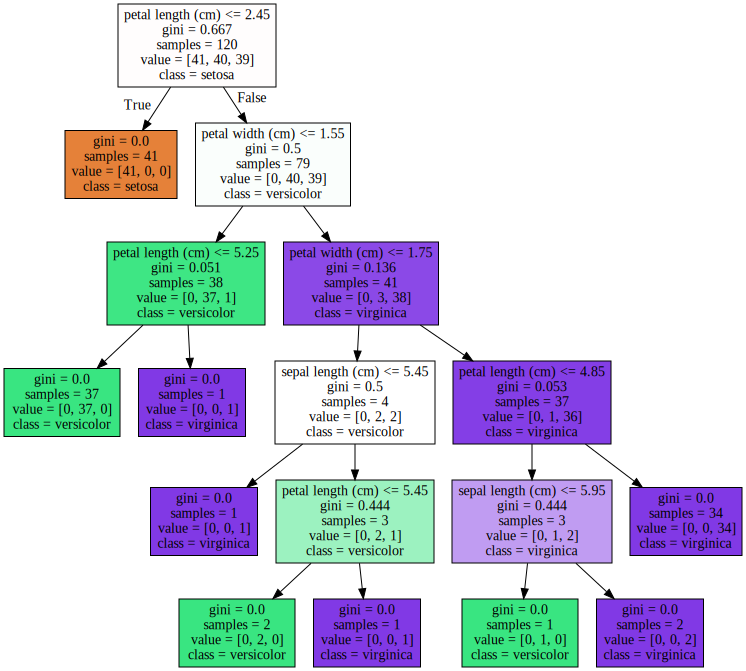

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz() 의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## feature_importance 구해보기

Feature importances: 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

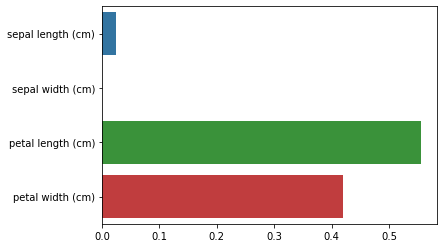

In [3]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances: \n{}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정트리 과적합 make_classification()

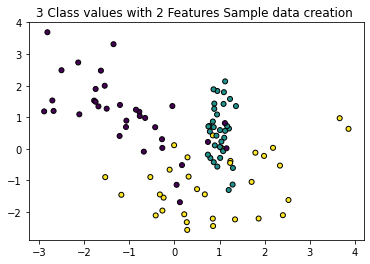

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
plt.title("3 Class values with 2 Features Sample data creation ")

# 2차원 시각화를 위해사 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

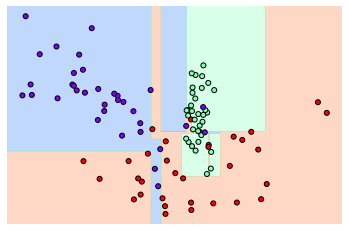

In [5]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

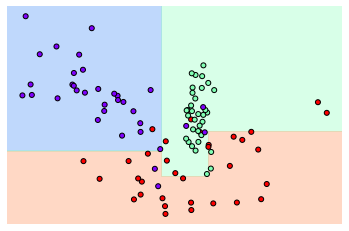

In [6]:
# 과적합이} 완화됨
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

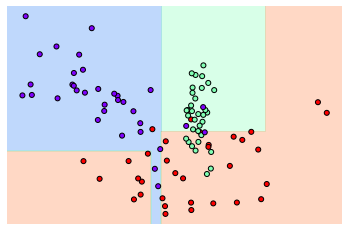

In [7]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 결정 트리 실습- 사용자 행동 인식 데이터 세트

In [8]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

# feature 이름 불러오기
# sep='\s+': 공백문자는 건너 뜀, header=None : 피처네임이 없는 것
feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist() # values로 피처이름만 받아온 후 tolist로 리스트 객체로 생성


In [9]:
# 겹치는 피처네임 없애기
def get_new_feature_name_df(old_feature_name_df):
    #column_name 컬럼에서 겹치는 이름을 찾아내서 몇번째 겹치는지 알려줌. 아래 박스에 결과를 보여주겠음
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),\
                                                                  columns=['dup_cnt'])
    #인덱스를 리셋함
    feature_dup_df = feature_dup_df.reset_index()
    # 어느 한쪽에라도 NaN이 있는 경우 NaN이 되도록 합침
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # columns 방향으로 lambda 함수를 사용함
    new_feature_name_df['column_name'] =new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])\
                                                                                             if x[1] >0 else x[0], axis=1) 
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [10]:
feature_dup_df = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(),\
                                                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
new_feature_name_df = pd.merge(feature_name_df.reset_index(), feature_dup_df, how='outer')
new_feature_name_df['column_name'] =new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])\
                                                                                             if x[1] >0 else x[0], axis=1) 
new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
new_feature_name_df

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [11]:
def get_human_dataset():
    feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep='\s+', header=None, names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep='\s+', header=None, names=feature_name)
    
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [12]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [13]:
# y 값이 고르게 분포함
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정트리 정확도: {0:.4f}".format(accuracy))
print("결정트리 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정트리 정확도: 0.8548
결정트리 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


## 최적의 하이퍼 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

결과값: 
Fitting 5 folds for each of 5 candidates, totalling 25 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [16]:
# 그리그서치 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_result_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127


#### max_depth 파라미터가 과도하게 크면 과적합으로 인해 성능이 저하되는 모습을 볼 수 있음.


## 1.2 앙상블 학습

1. 보팅(Voting) : 서로 다른 알고리즘을 가진 여러 개의 분류기가 투표를 통해서 결정하는 방식 
2. 배깅(Bagging) : 서로 같은 알고리즘을 가진 여러 개의 븐루기가 투표를 통해서 결정하는 방식
3. 부스팅(Boostin) : 여러 개의 븐루기가 순차적으로 학습을 수행하되, 점점 분류기를 개선시키는 방식

### 보팅 유형
1. 하드보팅 : 분류기의 결과값만을 이용해서 투표를 진행함
2. 소프트 보팅 : 분류기의 확률을 모두 더해서 투표를 진행함

## 1.2.1 랜덤포레스트

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_clf.predict(X_test))))

랜덤 포레스트 정확도: 0.9196


트리 기반의 앙상블 알고리즘은 하이퍼 파라미터가 많아서 튜닝을 위한 시간이 오래걸리는 단점이 있다.

In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1, )
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [19]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 0.9260


# 1.2.2 GBM(Gradient Boosing Machine)
## GBM 원리에 대한 설명 링크
https://yngie-c.github.io/machine%20learning/2021/03/21/gbm/

부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다. 

GBM알고리즘은 에이다부스트와 유사하나(code-it/Ensemble에 정리되어 있음) 가중치 업데이트를 경사라강법을 이용한다. 
또한, GBM 알고리즘은 CART(Classification And Regression Tree)와 마찬가지로 회기도 가능하다. 

### GBM을 사용한 사용자 행동 데이터 분석

``` python
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('GBM 정확도: {0:.4f}'. format(accuracy))
print('GBM 수행시간: ', time.time()-start_time,"초")
```

### GradientBoostingClassifier 하이퍼 파라미터
1. loss : 경사하강법에서 사용할 손실함수를 지정함. (depault = 'deviance')
2. learning_rate : GBM이 학습을 진행 할 때마다 적용하는 학습률을 설정함. (depault = 0.1)
3. n_estimators : weak learner의 개수 (depault = 100)
4. subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율 (depault = 1)

# 1.2.3 XGBoost (eXtra Gradient Boost)
GBM의 과적합 규재 부재, 느린 수행 시간을 보완한 알고리즘.
## XGBoost의 향상점 링크
https://towardsdatascience.com/xgboost-extreme-gradient-boosting-how-to-improve-on-regular-gradient-boosting-5c6acf66c70a

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier

## XGBoost의 하이퍼 파라미터
### 일반 파라미터
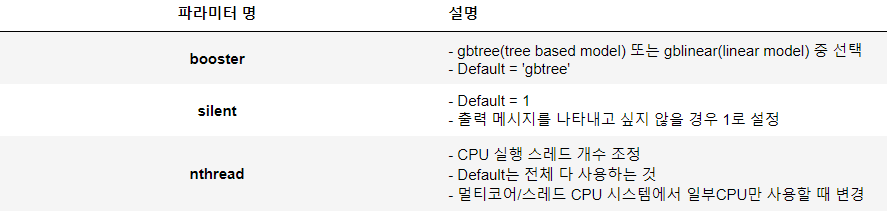


### 주요 부스터 파라미터
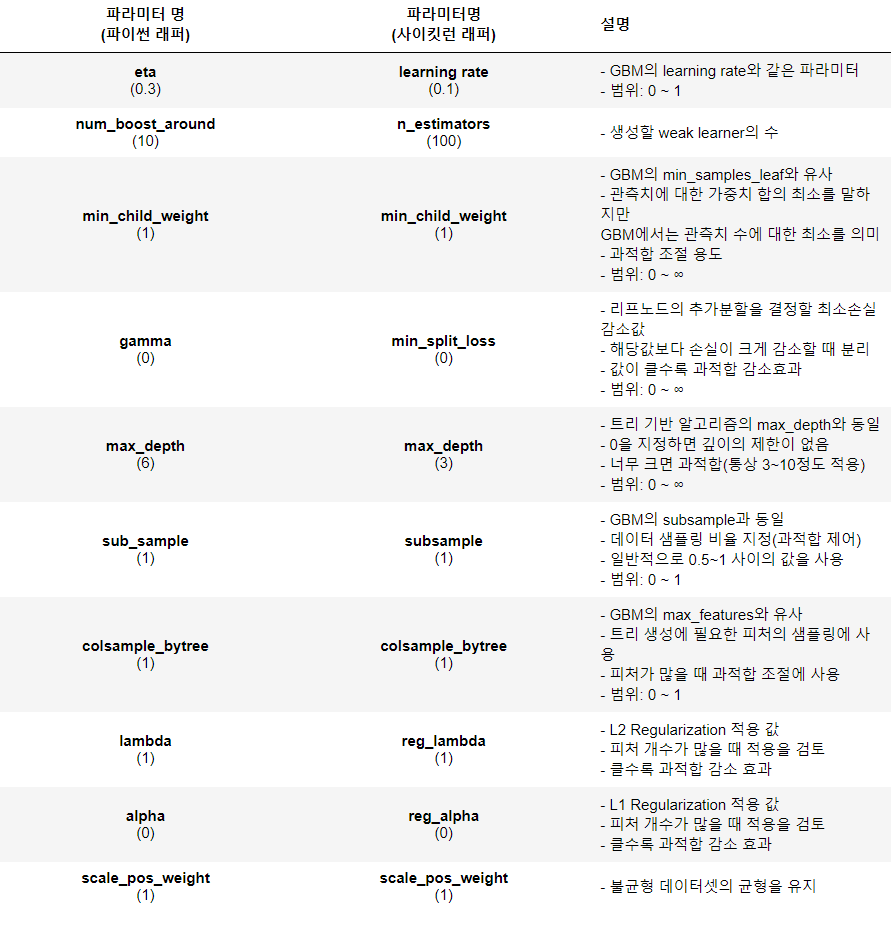

### 학습 태스크 파라미터
: 학습 수행 시의 객체함수, 평가를 위한 지표 등을 설정하는 파라미터

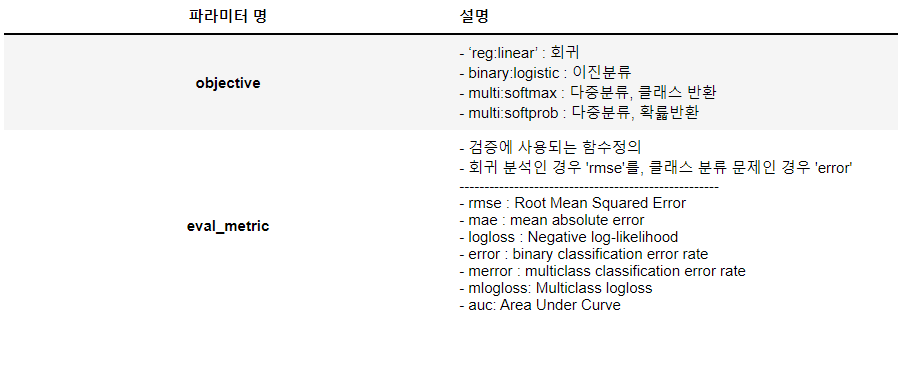


### 과적합 제어
1. eta 값을 낮춥니다.(0.01 ~ 0.1) → eta 값을 낮추면 num_boost_round(n_estimator)를 반대로 높여주어야 합니다.
2. max_depth 값을 낮춥니다.
3. min_child_weight 값을 높입니다.
4. gamma 값을 높입니다.
5. subsample과 colsample_bytree를 낮춥니다.


### Early Stopping 기능 :
GBM의 경우 n_estimators에 지정된 횟수만큼 학습을 끝까지 수행하지만, XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지
n_estimators 를 200으로 설정하고, 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 반복하다가
50회를 반복하는 동안 학습오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료합니다.
(가령 100회에서 학습오류 값이 0.8인데 101~150회 반복하는 동안 예측 오류가 0.8보다 작은 값이 하나도 없으면 부스팅을 종료)



## 파이썬 래퍼 XGB모듈을 이용한 위스콘신 유방암 예측

In [89]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
feature = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=feature, columns=dataset.feature_names)
cancer_df['target'] = labels

X_features = cancer_df.iloc[:, :-1]
y_labels = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

# train 데이터를 검증용과 학습용으로 분리/ XGB에서 제공하는 조기종료와 검증 성능평가를 사용하기 위함.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 파이썬 래퍼 XGBoost는 데이터를 DMatrix 형식으로넘겨줘야 한다. 이때 주요 파라미터는 feature 와 label
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# 파이썬 래퍼 XGBoost를 이용해 학습하려면 하이퍼파라미터를 딕셔너리 형태로 입력해줘야 한다.
params = {'max_depth':3,
          'eta' : 0.05,
          'objective' : 'binary:logistic',
          'eval_metric' : 'logloss'
        }
num_rounds = 400

# 학습 데이터 섹은 'train', 평가 데이터 셋은 'eval'로 명기함.
eval_list = [(dtr, 'train'), (dval, 'eval')]

# fit 대신 train을 이용해서 모델 학습
xgb_model = xgb.train(params= params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086
[176]	train-logloss:0.01258	eval-logloss:0.26103


#### 126번째 이후로 50회 동안 모델이 향상되지 않았기 때문에 조기종료함. (log-loss가 낮을 수록 성능이 좋다.)

In [90]:
# 파이썬 래퍼 XGBoost에서의 predict는 결과를 예측할 수 있는 확률을 리턴함. 
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))

preds = [1 if x>0.5 else 0 for x in pred_probs]
print(preds[:10])

[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬:')
    print(confusion)
    print('\n정확도: {}, 정밀도: {}, 재현율: {}, f1 스코어: {}, AUC: {}'.format(round(accuracy,4), round(precision,4), round(recall,4), round(f1,4), round(roc_auc, 4)))

    print('\n')

In [92]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬:
[[34  3]
 [ 2 75]]

정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.974, f1 스코어: 0.9677, AUC: 0.9937




<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

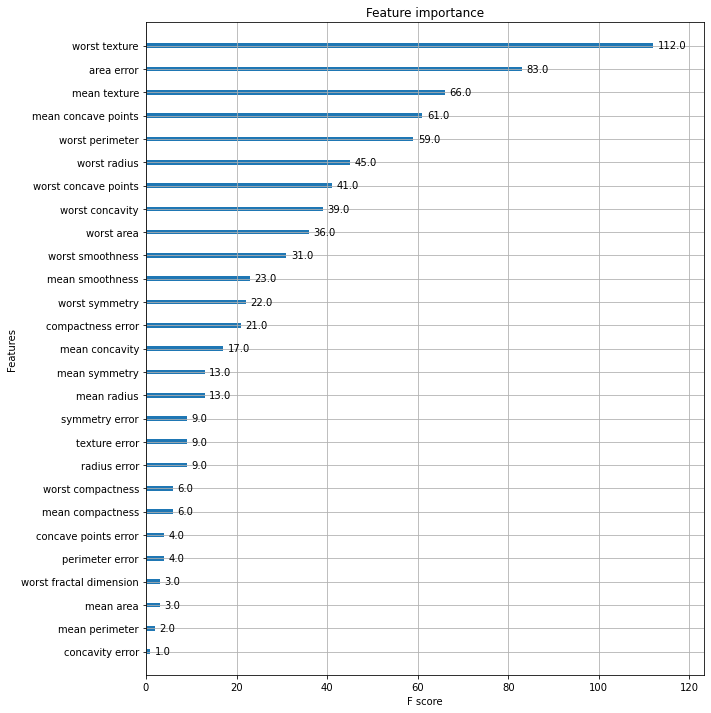

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

## 사이킷런 래퍼 XGBoost를 사용한 데이터 분석

In [94]:
from xgboost import XGBClassifier

#warning 메시지를 방지하기 위해서 eval_metric 값을 파라미터로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metrics="logloss")
xgb_wrapper.fit(X_train, y_train, verbose = 2)
w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, w_preds, w_preds_proba)

[20:02:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "eval_metrics" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:02:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬:
[[34  3]
 [ 1 76]]

정확도: 0.9649, 정밀도: 0.962, 재현율: 0.987, f1 스코어: 0.9744, AUC: 0.9954




## 사이킷런 래퍼 XGBoost를 이용한 조기종료

In [99]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
# 검증 세트 만들기
evals = [(X_tr, y_tr), (X_val, y_val)]

xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set = evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

[130]	validation_0-logloss:0.01886	validation_1-logloss:0.25712
[131]	validation_0-logloss:0.01863	validation_1-logloss:0.25609
[132]	validation_0-logloss:0.01839	validation_1-logloss:0.25649
[133]	validation_0-logloss:0.01816	validation_1-logloss:0.25789
[134]	validation_0-logloss:0.01802	validation_1-logloss:0.25811
[135]	validation_0-logloss:0.01785	validation_1-logloss:0.25794
[136]	validation_0-logloss:0.01763	validation_1-logloss:0.25876
[137]	validation_0-logloss:0.01748	validation_1-logloss:0.25884
[138]	validation_0-logloss:0.01732	validation_1-logloss:0.25867
[139]	validation_0-logloss:0.01719	validation_1-logloss:0.25876
[140]	validation_0-logloss:0.01696	validation_1-logloss:0.25987
[141]	validation_0-logloss:0.01681	validation_1-logloss:0.25960
[142]	validation_0-logloss:0.01669	validation_1-logloss:0.25982
[143]	validation_0-logloss:0.01656	validation_1-logloss:0.25992
[144]	validation_0-logloss:0.01638	validation_1-logloss:0.26035
[145]	validation_0-logloss:0.01623	valid

# 1.2.4 LightGBM
- XGBoost보다 빠르다. 
- XGBoost보다 메모리 사용이 적다.
- 카테고리형 피처의 자동 변환과 최적 분할

## LightGBM 의 하이퍼 파라미터
 
앞서 설명했듯이 LightGBM은 리프 중심 트리 분할 방식을 이용해 트리의 깊이가 매우 깊어지기 때문에 max_depth에 대한 파라미터 설정이 중요합니다.

 
## 주요 파라미터
 
- num_iteration [default=100] : 반복 수행하기 위한 트리의 개수 지정. 크게 지정할수록 예측 성능이 높아질 수 있지만 과적합 문제 가능성 또한 높아짐.
- learning_rate [default=0.1] : 0~1 사이의 값을 지정해 부스팅 스텝을 반복적으로 수행할 때 업데이트 되는 학습률 값. 일반적으로 n_estimators를 크게하고 learning_rate을 작게 해서 예측 성능 향상 가능, 과적합 이슈 동반.
- max_depth [default=-1]: 0보다 작은 값을 지정하면 깊이에 제한 없음.
- min_data_in_leaf [default=20] : 결정 트리의 min_samples_leaf와 동일. 최종 결정 클래스인 리프 노드가 되기 위해 최소한으로 필요한 레코드 수. (과적합 방지용)
- num_leaves [default=32] : 하나의 트리가 가질 수 있는 최대 리프 수
- boosting [default=gbdt] : 부스팅 트리를 생성하는 알고리즘 (gbdt:일반적인 그래디언트 부스팅, rf:랜덤포레스트)
- bagging_fraction [default=1.0] : 트리가 커져서 과적합 되는 것을 방지하기 위한 데이터 샘플링 비율.
- feature_fraction [default=1.0] : 개별 트리를 학습할 때 무작위로 선택되는 피처의 비율 (GBM의 max_features와 동일)
- lambda_I2 [default=0.0] : L2 regulation 제어를 위한 값. 피처 개수가 많을 경우 적용 검토. 값이 클수록 과적합 감소 효과
- lambda_I1[default=0.0] : L1 regulation 제어를 위한 값. 과적합 방지용.
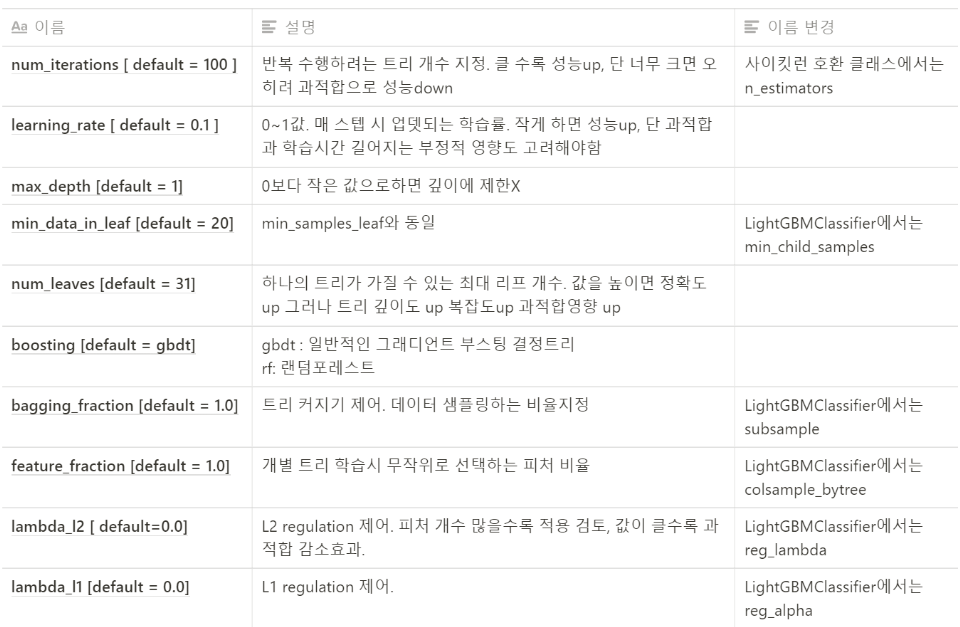
 
## Learning Task 파라미터¶
 
- objective : 최솟값을 가져야 할 손실함수 정의. (회귀, 분류(다중, 이진) 문제에 따라 지정)
 
## 하이퍼 파라미터 튜닝 방안¶
 
num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하는 것이 모델의 복잡도를 줄이는 가장 기본적인 튜닝 방식입니다.

 
- num_leaves 는 개별 트리가 가질 수 있는 최대 리프의 개수를 지정합니다. (LightGBM 복잡도를 제어하는 주 파라미터) num_leaves가 클수록 모델의 깊이가 깊어지므로 모델 정확도가 높아질 수 있지만 과적합 문제가 발생할 확률 또한 높아집니다.
- min_data_in_leaf(min_child_in_leaf)는 과적합 개선을 위해 사용되는 주 파라미터로 큰 값을 설정하는 경우 트리가 깊어지는 것을 방지합니다.
- max_depth는 명시적으로 트리의 깊이를 제어하는 파라미터 입니다.
 

## 사이킷런 래퍼 lightGBM 을 이용한 위스콘신 유방암 예측

In [187]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns= dataset.feature_names)
cancer_df['target'] = dataset.target

X=cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=False)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

In [188]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬:
[[34  3]
 [ 2 75]]

정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.974, f1 스코어: 0.9677, AUC: 0.9877




# 1.3 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

베이지안 최적화란 블랙박스 형태의 함수를 다룰 때 유용하다. 

들어가는 변수(파라미터)에 대한 아웃풋의 변화를 아웃풋의 결과로만 알 수 있을 때 유용하게 사용될 수 있다. <br>
간단한 논리?는 반복을 통한 개선이다. <br>
관측을 통해서 다음에 들어올 변수를 추천하는 것이다.

앞선 gridsearch 를 사용하면 시간이 어어어어어어엄청나게 오래 걸리는걸 경험했다. 이럴 때 베이지안 최적화를 사용하면 될 것 같다.

근데 의문이 드는게 한가지 있다. 왜?? GBM, XGB, LGBM 머신러닝 식들이 블랙박스 형태일까?? 결국 식으로 이루어져 있을 것 같은데, 잘 이해가 안간다. 

## hyperopt 검색 공간

In [106]:
from hyperopt import hp

#-10 ~ 10 까지 1간격을 가지는 입력 변수 x와 -15~15까지 1간격으로 입력 변수 y 설정.
search_space = {'x':hp.quniform('x', -10, 10, 1), 'y':hp.quniform('y',-15,15,1)}


- hp.choice(label, options)

Returns one of the options, which should be a list or tuple. The elements of options can themselves be [nested] stochastic expressions. In this case, the stochastic choices that only appear in some of the options become conditional parameters.

- hp.randint(label, upper)

Returns a random integer in the range [0, upper). The semantics of this distribution is that there is no more correlation in the loss function between nearby integer values, as compared with more distant integer values. This is an appropriate distribution for describing random seeds for example. If the loss function is probably more correlated for nearby integer values, then you should probably use one of the "quantized" continuous distributions, such as either quniform, qloguniform, qnormal or qlognormal.

- hp.uniform(label, low, high)

Returns a value uniformly between low and high.
When optimizing, this variable is constrained to a two-sided interval.

- hp.quniform(label, low, high, q)

Returns a value like round(uniform(low, high) / q) * q
Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below.

- hp.loguniform(label, low, high)

Returns a value drawn according to exp(uniform(low, high)) so that the logarithm of the return value is uniformly distributed.
When optimizing, this variable is constrained to the interval [exp(low), exp(high)].

## hyperopt 목적 함수 

목적함수는 반드시 변수값과 검색 공간을 가지는 딕셔너리를 인자로 받고, 숫자형 단일값 또는 {'loss':retval, 'status':STATUS_OK} 형태의 딕셔너리를 리턴해야함.

In [110]:
from hyperopt import STATUS_OK

def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

## hyperopt::fmin() 
fmin(fn: 목적함수, space, algo(depault='TPE'), max_evals: 입력값 시도 횟수,trials: 입력값 및 목적 함수 반환값 결과를 저장/ Trials 클래스를 객체로 생성한 변수명 입력)

In [114]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()

best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.default_rng(seed=0))

print("best", best_01)

100%|██████████| 5/5 [00:00<00:00, 250.69trial/s, best loss: -224.0]
best {'x': -4.0, 'y': 12.0}


In [115]:
trial_val = Trials()

best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))

print("best", best_02)

100%|██████████| 20/20 [00:00<00:00, 418.60trial/s, best loss: -296.0]
best {'x': 2.0, 'y': 15.0}


## Trials 객체의 구조
- result: [{'loss':함수 반환값, 'status':반환 상태값}] = 함수의 반복 수행 시마다 반환되는 반환값
- vals: {'입력변수명': 개별 수행 시마다 입력된 값 리스트}  = 함수의 반복수행 시마다 입력되는 입력 변숫값

In [117]:
print(trial_val.results)
print(trial_val.vals)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]
{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [119]:
import pandas as pd
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


# HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [124]:
from hyperopt import hp

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                   'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                   'learning_rate': hp.uniform('learning_rate', 0.01, 2), 
                   'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)} #uniform: 정규분포

## 유의사항
1. 검색 공간에서 목적 함수로 입력되는 모든 인자들은 실수형 값이므로 이들을 XGBoostClassifier의 정수형 하이퍼 파라미터값으로 설정할 떄는 정수형으로 형변환을 해야함. ex) XGBoostClassifier(max_depth=int(search_space['max_depth'])
2. fmin을 사용하기 때문에 정확도같이 값이 클수록 좋은 성능 지표일 경우 -1를 곱한 뒤 반환해야 한다. 

In [134]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           learning_rate=(search_space['learning_rate']),
                           colsample_bytree=search_space['colsample_bytree'],
                           eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    return {'loss':-1*np.mean(accuracy), 'status': STATUS_OK}

In [135]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50,
           trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best: ',best)

100%|██████████| 50/50 [00:27<00:00,  1.82trial/s, best loss: -0.9780411293133495]
best:  {'colsample_bytree': 0.5267585221196857, 'learning_rate': 0.7962636421852388, 'max_depth': 8.0, 'min_child_weight': 1.0}


# 1.4 캐글 산탄데르 고객 만족 예측 

## 1.4.1 데이터전처리

In [204]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv('train_santander.csv',encoding='latin-1')

In [205]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [206]:
cust_df['TARGET'].value_counts()
#unsatisfied 비율은 0.04%

0    73012
1     3008
Name: TARGET, dtype: int64

In [207]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


- 99999는 이상한 값인 것 같다.

In [208]:
print(cust_df['var3'].value_counts()[:3])

 2         74165
 8           138
-999999      116
Name: var3, dtype: int64


In [209]:
cust_df['var3'].replace(-999999, 2, inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:, -1]
print("피처 데이터 크기: ",X_features.shape)

피처 데이터 크기:  (76020, 370)


- train test 셋 분리. 비대칭적 데이터셋이므로 비율에 맞게 분리되었는지 판단하기

In [210]:
X_train,X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

print("test셋 분포 비: \n")
print(y_test.value_counts()/y_test.count())
print("\ntrain셋 분포 비: \n")
print(y_train.value_counts()/y_train.count())

test셋 분포 비: 

0    0.9583
1    0.0417
Name: TARGET, dtype: float64

train셋 분포 비: 

0    0.960964
1    0.039036
Name: TARGET, dtype: float64


- 조기중단을 위해서 검증셋 만들기 

In [211]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## 1.4.2 XGBoost 모델학습, 하이퍼 파라미터 튜닝

In [212]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)
xgb_clf.fit(X_tr, y_tr,  early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82178	validation_1-auc:0.80117
[1]	validation_0-auc:0.83011	validation_1-auc:0.80957
[2]	validation_0-auc:0.83182	validation_1-auc:0.80969
[3]	validation_0-auc:0.83270	validation_1-auc:0.80948
[4]	validation_0-auc:0.83393	validation_1-auc:0.80979
[5]	validation_0-auc:0.83486	validation_1-auc:0.80945
[6]	validation_0-auc:0.83583	validation_1-auc:0.81030
[7]	validation_0-auc:0.83858	validation_1-auc:0.81193
[8]	validation_0-auc:0.83891	validation_1-auc:0.81395
[9]	validation_0-auc:0.83954	validation_1-auc:0.81432
[10]	validation_0-auc:0.83920	validation_1-auc:0.81371
[11]	validation_0-auc:0.83920	validation_1-auc:0.81344
[12]	validation_0-auc:0.84017	validation_1-auc:0.81407
[13]	validation_0-auc:0.84040	validation_1-auc:0.81401
[14]	validation_0-auc:0.84071	validation_1-auc:0.81399
[15]	validation_0-auc:0.84279	validation_1-auc:0.81586
[16]	validation_0-auc:0.84306	validation_1-auc:0.81606
[17]	validation_0-auc:0.84366	validation_1-auc:0.81638
[18]	validation_0-au

[149]	validation_0-auc:0.90927	validation_1-auc:0.83398
[150]	validation_0-auc:0.90939	validation_1-auc:0.83408
[151]	validation_0-auc:0.90953	validation_1-auc:0.83403
[152]	validation_0-auc:0.90958	validation_1-auc:0.83399
[153]	validation_0-auc:0.90969	validation_1-auc:0.83403
[154]	validation_0-auc:0.90978	validation_1-auc:0.83403
[155]	validation_0-auc:0.90996	validation_1-auc:0.83410
[156]	validation_0-auc:0.91009	validation_1-auc:0.83405
[157]	validation_0-auc:0.91024	validation_1-auc:0.83402
[158]	validation_0-auc:0.91030	validation_1-auc:0.83408
[159]	validation_0-auc:0.91033	validation_1-auc:0.83410
[160]	validation_0-auc:0.91039	validation_1-auc:0.83412
[161]	validation_0-auc:0.91046	validation_1-auc:0.83413
[162]	validation_0-auc:0.91059	validation_1-auc:0.83410
[163]	validation_0-auc:0.91071	validation_1-auc:0.83415
[164]	validation_0-auc:0.91077	validation_1-auc:0.83411
[165]	validation_0-auc:0.91082	validation_1-auc:0.83412
[166]	validation_0-auc:0.91114	validation_1-auc:

- 베이지안 최적화를 통한 하이퍼 파라미터 튜닝

In [181]:
from hyperopt import hp
xgb_search_space={'max_depth':hp.quniform('max_depth',5, 15, 1),
                  'min_child_weight':hp.quniform('min_chile_weight', 1, 6, 1),
                  'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 0.95),
                  'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)}

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'])
    roc_auc_list= []
    skf = StratifiedKFold(n_splits=3)
    
    for tr_index, val_index in skf.split(X_train, y_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val,y_val)], )
        
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
    return -1*np.mean(roc_auc_list)

In [182]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=5,
           trials=trials,rstate=np.random.default_rng(seed=30))
print(best)

[0]	validation_0-auc:0.82206	validation_1-auc:0.79877
[1]	validation_0-auc:0.82652	validation_1-auc:0.80316
[2]	validation_0-auc:0.83272	validation_1-auc:0.80504
[3]	validation_0-auc:0.83454	validation_1-auc:0.80676
[4]	validation_0-auc:0.83845	validation_1-auc:0.80983
[5]	validation_0-auc:0.84040	validation_1-auc:0.81326
[6]	validation_0-auc:0.84123	validation_1-auc:0.81375
[7]	validation_0-auc:0.84264	validation_1-auc:0.81540
[8]	validation_0-auc:0.84363	validation_1-auc:0.81517
[9]	validation_0-auc:0.84494	validation_1-auc:0.81530
[10]	validation_0-auc:0.84605	validation_1-auc:0.81592
[11]	validation_0-auc:0.84620	validation_1-auc:0.81522
[12]	validation_0-auc:0.84669	validation_1-auc:0.81515
[13]	validation_0-auc:0.84774	validation_1-auc:0.81602
[14]	validation_0-auc:0.84913	validation_1-auc:0.81687
[15]	validation_0-auc:0.85231	validation_1-auc:0.81905
[16]	validation_0-auc:0.85311	validation_1-auc:0.82027
[17]	validation_0-auc:0.85497	validation_1-auc:0.82379
[18]	validation_0-au

[56]	validation_0-auc:0.89225	validation_1-auc:0.83508
[57]	validation_0-auc:0.89295	validation_1-auc:0.83468
[58]	validation_0-auc:0.89327	validation_1-auc:0.83504
[59]	validation_0-auc:0.89406	validation_1-auc:0.83505
[60]	validation_0-auc:0.89465	validation_1-auc:0.83527
[61]	validation_0-auc:0.89485	validation_1-auc:0.83545
[62]	validation_0-auc:0.89521	validation_1-auc:0.83522
[63]	validation_0-auc:0.89540	validation_1-auc:0.83515
[64]	validation_0-auc:0.89582	validation_1-auc:0.83491
[65]	validation_0-auc:0.89651	validation_1-auc:0.83479
[66]	validation_0-auc:0.89697	validation_1-auc:0.83493
[67]	validation_0-auc:0.89748	validation_1-auc:0.83522
[68]	validation_0-auc:0.89769	validation_1-auc:0.83528
[69]	validation_0-auc:0.89779	validation_1-auc:0.83545
[70]	validation_0-auc:0.89807	validation_1-auc:0.83551
[71]	validation_0-auc:0.89829	validation_1-auc:0.83549
[72]	validation_0-auc:0.89864	validation_1-auc:0.83552
[73]	validation_0-auc:0.89911	validation_1-auc:0.83544
[74]	valid

[3]	validation_0-auc:0.82030	validation_1-auc:0.78626                           
[4]	validation_0-auc:0.83500	validation_1-auc:0.79754                           
[5]	validation_0-auc:0.83666	validation_1-auc:0.79686                           
[6]	validation_0-auc:0.84268	validation_1-auc:0.80330                           
[7]	validation_0-auc:0.84746	validation_1-auc:0.80539                           
[8]	validation_0-auc:0.85130	validation_1-auc:0.80922                           
[9]	validation_0-auc:0.85476	validation_1-auc:0.81276                           
[10]	validation_0-auc:0.85928	validation_1-auc:0.81688                          
[11]	validation_0-auc:0.85969	validation_1-auc:0.81710                          
[12]	validation_0-auc:0.86017	validation_1-auc:0.81417                          
[13]	validation_0-auc:0.86412	validation_1-auc:0.81676                          
[14]	validation_0-auc:0.86694	validation_1-auc:0.82000                          
[15]	validation_0-auc:0.8694

[9]	validation_0-auc:0.85927	validation_1-auc:0.82310                           
[10]	validation_0-auc:0.86233	validation_1-auc:0.82634                          
[11]	validation_0-auc:0.86511	validation_1-auc:0.82451                          
[12]	validation_0-auc:0.86665	validation_1-auc:0.82152                          
[13]	validation_0-auc:0.86952	validation_1-auc:0.82345                          
[14]	validation_0-auc:0.87191	validation_1-auc:0.82546                          
[15]	validation_0-auc:0.87410	validation_1-auc:0.82754                          
[16]	validation_0-auc:0.87567	validation_1-auc:0.82853                          
[17]	validation_0-auc:0.87661	validation_1-auc:0.82644                          
[18]	validation_0-auc:0.87757	validation_1-auc:0.82445                          
[19]	validation_0-auc:0.87985	validation_1-auc:0.82537                          
[20]	validation_0-auc:0.88245	validation_1-auc:0.82652                          
[21]	validation_0-auc:0.8839

[15]	validation_0-auc:0.87313	validation_1-auc:0.82508                          
[16]	validation_0-auc:0.87448	validation_1-auc:0.82645                          
[17]	validation_0-auc:0.87587	validation_1-auc:0.82574                          
[18]	validation_0-auc:0.87797	validation_1-auc:0.82477                          
[19]	validation_0-auc:0.87950	validation_1-auc:0.82640                          
[20]	validation_0-auc:0.88113	validation_1-auc:0.82764                          
[21]	validation_0-auc:0.88338	validation_1-auc:0.82834                          
[22]	validation_0-auc:0.88587	validation_1-auc:0.82607                          
[23]	validation_0-auc:0.88549	validation_1-auc:0.82539                          
[24]	validation_0-auc:0.88709	validation_1-auc:0.82667                          
[25]	validation_0-auc:0.88896	validation_1-auc:0.82681                          
[26]	validation_0-auc:0.89089	validation_1-auc:0.82701                          
[27]	validation_0-auc:0.8909

[16]	validation_0-auc:0.90576	validation_1-auc:0.82720                          
[17]	validation_0-auc:0.90762	validation_1-auc:0.82677                          
[18]	validation_0-auc:0.91022	validation_1-auc:0.82541                          
[19]	validation_0-auc:0.91244	validation_1-auc:0.82698                          
[20]	validation_0-auc:0.91594	validation_1-auc:0.82707                          
[21]	validation_0-auc:0.91885	validation_1-auc:0.82751                          
[22]	validation_0-auc:0.92123	validation_1-auc:0.82618                          
[23]	validation_0-auc:0.92308	validation_1-auc:0.82658                          
[24]	validation_0-auc:0.92531	validation_1-auc:0.82697                          
[25]	validation_0-auc:0.92832	validation_1-auc:0.82624                          
[26]	validation_0-auc:0.93055	validation_1-auc:0.82580                          
[27]	validation_0-auc:0.93212	validation_1-auc:0.82576                          
[28]	validation_0-auc:0.9341

[26]	validation_0-auc:0.93450	validation_1-auc:0.82989                          
[27]	validation_0-auc:0.93634	validation_1-auc:0.82988                          
[28]	validation_0-auc:0.93822	validation_1-auc:0.82942                          
[29]	validation_0-auc:0.93915	validation_1-auc:0.82957                          
[30]	validation_0-auc:0.94056	validation_1-auc:0.82948                          
[31]	validation_0-auc:0.94188	validation_1-auc:0.82986                          
[32]	validation_0-auc:0.94296	validation_1-auc:0.83000                          
[33]	validation_0-auc:0.94398	validation_1-auc:0.83010                          
[34]	validation_0-auc:0.94508	validation_1-auc:0.82937                          
[35]	validation_0-auc:0.94611	validation_1-auc:0.82973                          
[36]	validation_0-auc:0.94693	validation_1-auc:0.83028                          
[37]	validation_0-auc:0.94821	validation_1-auc:0.83044                          
[38]	validation_0-auc:0.9491

[81]	validation_0-auc:0.92816	validation_1-auc:0.83023                          
[82]	validation_0-auc:0.92820	validation_1-auc:0.83010                          
[83]	validation_0-auc:0.92890	validation_1-auc:0.83005                          
[84]	validation_0-auc:0.92941	validation_1-auc:0.83049                          
[85]	validation_0-auc:0.93013	validation_1-auc:0.83038                          
[86]	validation_0-auc:0.93044	validation_1-auc:0.83008                          
[87]	validation_0-auc:0.93088	validation_1-auc:0.83008                          
[88]	validation_0-auc:0.93148	validation_1-auc:0.83023                          
[89]	validation_0-auc:0.93200	validation_1-auc:0.82980                          
[90]	validation_0-auc:0.93267	validation_1-auc:0.83010                          
[91]	validation_0-auc:0.93329	validation_1-auc:0.83017                          
[92]	validation_0-auc:0.93369	validation_1-auc:0.83032                          
[93]	validation_0-auc:0.9342

[31]	validation_0-auc:0.89104	validation_1-auc:0.82808                          
[32]	validation_0-auc:0.89245	validation_1-auc:0.82835                          
[33]	validation_0-auc:0.89372	validation_1-auc:0.82888                          
[34]	validation_0-auc:0.89445	validation_1-auc:0.82832                          
[35]	validation_0-auc:0.89521	validation_1-auc:0.82812                          
[36]	validation_0-auc:0.89638	validation_1-auc:0.82869                          
[37]	validation_0-auc:0.89819	validation_1-auc:0.82947                          
[38]	validation_0-auc:0.89869	validation_1-auc:0.82872                          
[39]	validation_0-auc:0.90030	validation_1-auc:0.82855                          
[40]	validation_0-auc:0.90102	validation_1-auc:0.82945                          
[41]	validation_0-auc:0.90242	validation_1-auc:0.83062                          
[42]	validation_0-auc:0.90389	validation_1-auc:0.82973                          
[43]	validation_0-auc:0.9049

[49]	validation_0-auc:0.96443	validation_1-auc:0.82153                          
[50]	validation_0-auc:0.96471	validation_1-auc:0.82108                          
[51]	validation_0-auc:0.96487	validation_1-auc:0.82041                          
[52]	validation_0-auc:0.96500	validation_1-auc:0.82017                          
[53]	validation_0-auc:0.96528	validation_1-auc:0.82010                          
[54]	validation_0-auc:0.96563	validation_1-auc:0.82015                          
[55]	validation_0-auc:0.96609	validation_1-auc:0.81978                          
[56]	validation_0-auc:0.96679	validation_1-auc:0.81968                          
[57]	validation_0-auc:0.96686	validation_1-auc:0.81971                          
[58]	validation_0-auc:0.96709	validation_1-auc:0.81940                          
[59]	validation_0-auc:0.96720	validation_1-auc:0.81932                          
[60]	validation_0-auc:0.96834	validation_1-auc:0.81906                          
[61]	validation_0-auc:0.9694

[32]	validation_0-auc:0.96079	validation_1-auc:0.82878                          
[33]	validation_0-auc:0.96111	validation_1-auc:0.82850                          
[34]	validation_0-auc:0.96176	validation_1-auc:0.82827                          
[35]	validation_0-auc:0.96321	validation_1-auc:0.82724                          
[36]	validation_0-auc:0.96480	validation_1-auc:0.82808                          
[37]	validation_0-auc:0.96505	validation_1-auc:0.82857                          
[38]	validation_0-auc:0.96513	validation_1-auc:0.82865                          
[39]	validation_0-auc:0.96595	validation_1-auc:0.82903                          
[40]	validation_0-auc:0.96655	validation_1-auc:0.82917                          
[41]	validation_0-auc:0.96714	validation_1-auc:0.82924                          
[42]	validation_0-auc:0.96798	validation_1-auc:0.82911                          
[43]	validation_0-auc:0.96822	validation_1-auc:0.82934                          
[44]	validation_0-auc:0.9684

In [199]:
best

{'colsample_bytree': 0.753532317468581,
 'learning_rate': 0.08326583869166816,
 'max_depth': 6.0,
 'min_child_weight': 2.0}

In [216]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=int(5),
                           colsample_bytree=(0.5749),
                            learning_rate=(0.1514),
                       min_child_weight=int(6))
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr,y_tr),(X_val,y_val)], )

[0]	validation_0-auc:0.82138	validation_1-auc:0.80582
[1]	validation_0-auc:0.82690	validation_1-auc:0.80718
[2]	validation_0-auc:0.82980	validation_1-auc:0.80998
[3]	validation_0-auc:0.83199	validation_1-auc:0.81322
[4]	validation_0-auc:0.84005	validation_1-auc:0.82142
[5]	validation_0-auc:0.83960	validation_1-auc:0.82025
[6]	validation_0-auc:0.84260	validation_1-auc:0.82294
[7]	validation_0-auc:0.84600	validation_1-auc:0.82389
[8]	validation_0-auc:0.84796	validation_1-auc:0.82385
[9]	validation_0-auc:0.84879	validation_1-auc:0.82395
[10]	validation_0-auc:0.85031	validation_1-auc:0.82518
[11]	validation_0-auc:0.85036	validation_1-auc:0.82588
[12]	validation_0-auc:0.84961	validation_1-auc:0.82343
[13]	validation_0-auc:0.85165	validation_1-auc:0.82348
[14]	validation_0-auc:0.85382	validation_1-auc:0.82722
[15]	validation_0-auc:0.85626	validation_1-auc:0.82951
[16]	validation_0-auc:0.85694	validation_1-auc:0.83084
[17]	validation_0-auc:0.85740	validation_1-auc:0.83121
[18]	validation_0-au

[149]	validation_0-auc:0.91008	validation_1-auc:0.83396
[150]	validation_0-auc:0.91031	validation_1-auc:0.83398
[151]	validation_0-auc:0.91036	validation_1-auc:0.83394
[152]	validation_0-auc:0.91044	validation_1-auc:0.83387
[153]	validation_0-auc:0.91095	validation_1-auc:0.83384
[154]	validation_0-auc:0.91097	validation_1-auc:0.83378
[155]	validation_0-auc:0.91131	validation_1-auc:0.83360
[156]	validation_0-auc:0.91134	validation_1-auc:0.83348
[157]	validation_0-auc:0.91154	validation_1-auc:0.83333
[158]	validation_0-auc:0.91182	validation_1-auc:0.83331
[159]	validation_0-auc:0.91192	validation_1-auc:0.83317
[160]	validation_0-auc:0.91228	validation_1-auc:0.83316
[161]	validation_0-auc:0.91241	validation_1-auc:0.83311
[162]	validation_0-auc:0.91280	validation_1-auc:0.83307
[163]	validation_0-auc:0.91300	validation_1-auc:0.83309
[164]	validation_0-auc:0.91305	validation_1-auc:0.83311
[165]	validation_0-auc:0.91309	validation_1-auc:0.83315
[166]	validation_0-auc:0.91345	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5749,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1514, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [217]:
score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
score


0.8445410386927894

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

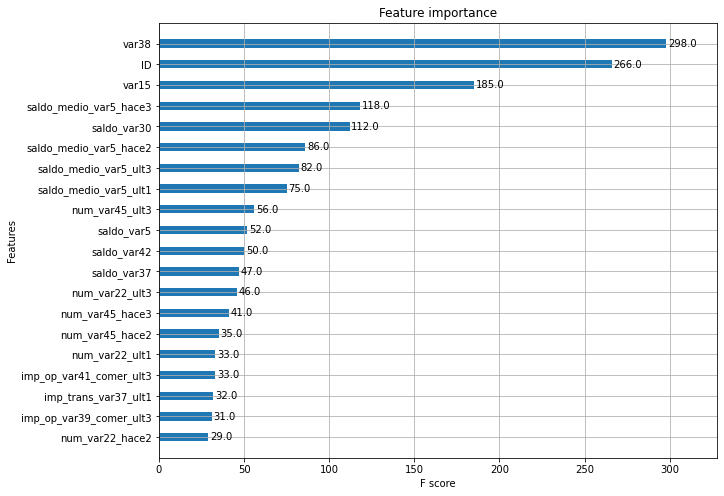

In [220]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## 1.4.3 LightGBM 모델학습과 하이퍼 파라미터 튜닝

In [226]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set, verbose=0)

print("ROC AUC socre: ", roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:, 1]))

ROC AUC socre:  0.8371932301150327


In [233]:
from hyperopt import hp
lgbm_search_space={'max_depth':hp.quniform('max_depth',100, 160, 1),
                  'num_leaves':hp.quniform('num_leaves', 32, 64, 1),
                  'min_child_samples':hp.quniform('min_child_samples', 60, 100, 1),
                  'learning_rate':hp.uniform('learning_rate', 0.01, 0.2),
                 'subsample':hp.uniform('subsample',0.7,1)}

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_samples=int(search_space['min_child_samples']),
                           subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate'])
    roc_auc_list= []
    skf = StratifiedKFold(n_splits=3)
    
    for tr_index, val_index in skf.split(X_train, y_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val,y_val)], )
        
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
    return -1*np.mean(roc_auc_list)

In [234]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func,
           space=lgbm_search_space,
           algo=tpe.suggest,
           max_evals=5,
           trials=trials,rstate=np.random.default_rng(seed=30))
print(best)

[1]	training's auc: 0.826575	training's binary_logloss: 0.162639	valid_1's auc: 0.805095	valid_1's binary_logloss: 0.162899
[2]	training's auc: 0.827079	training's binary_logloss: 0.160648	valid_1's auc: 0.805323	valid_1's binary_logloss: 0.161216
[3]	training's auc: 0.832193	training's binary_logloss: 0.158871	valid_1's auc: 0.807771	valid_1's binary_logloss: 0.159738
[4]	training's auc: 0.836267	training's binary_logloss: 0.157231	valid_1's auc: 0.811605	valid_1's binary_logloss: 0.158364
[5]	training's auc: 0.837316	training's binary_logloss: 0.155736	valid_1's auc: 0.811927	valid_1's binary_logloss: 0.157138
[6]	training's auc: 0.837837	training's binary_logloss: 0.154383	valid_1's auc: 0.81168	valid_1's binary_logloss: 0.156075
[7]	training's auc: 0.837949	training's binary_logloss: 0.153133	valid_1's auc: 0.811767	valid_1's binary_logloss: 0.155046
[8]	training's auc: 0.838663	training's binary_logloss: 0.151932	valid_1's auc: 0.812576	valid_1's binary_logloss: 0.154063
[9]	train

[67]	training's auc: 0.875481	training's binary_logloss: 0.127109	valid_1's auc: 0.829708	valid_1's binary_logloss: 0.136686
[68]	training's auc: 0.875642	training's binary_logloss: 0.126948	valid_1's auc: 0.829745	valid_1's binary_logloss: 0.136621
[69]	training's auc: 0.875911	training's binary_logloss: 0.126788	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.136566
[70]	training's auc: 0.876267	training's binary_logloss: 0.126623	valid_1's auc: 0.829788	valid_1's binary_logloss: 0.136504
[71]	training's auc: 0.876535	training's binary_logloss: 0.126473	valid_1's auc: 0.829754	valid_1's binary_logloss: 0.136449
[72]	training's auc: 0.876936	training's binary_logloss: 0.126296	valid_1's auc: 0.829787	valid_1's binary_logloss: 0.136402
[73]	training's auc: 0.877104	training's binary_logloss: 0.126144	valid_1's auc: 0.82991	valid_1's binary_logloss: 0.136345
[74]	training's auc: 0.877626	training's binary_logloss: 0.125982	valid_1's auc: 0.830005	valid_1's binary_logloss: 0.136299
[

[33]	training's auc: 0.860699	training's binary_logloss: 0.135997	valid_1's auc: 0.835271	valid_1's binary_logloss: 0.140654
[34]	training's auc: 0.86125	training's binary_logloss: 0.135614	valid_1's auc: 0.835215	valid_1's binary_logloss: 0.140383
[35]	training's auc: 0.861857	training's binary_logloss: 0.135249	valid_1's auc: 0.835035	valid_1's binary_logloss: 0.140134
[36]	training's auc: 0.862265	training's binary_logloss: 0.134892	valid_1's auc: 0.835018	valid_1's binary_logloss: 0.139875
[37]	training's auc: 0.862865	training's binary_logloss: 0.134552	valid_1's auc: 0.834974	valid_1's binary_logloss: 0.13964
[38]	training's auc: 0.863198	training's binary_logloss: 0.134222	valid_1's auc: 0.834663	valid_1's binary_logloss: 0.13943
[39]	training's auc: 0.863529	training's binary_logloss: 0.133904	valid_1's auc: 0.834589	valid_1's binary_logloss: 0.139219
[40]	training's auc: 0.863993	training's binary_logloss: 0.133592	valid_1's auc: 0.834522	valid_1's binary_logloss: 0.139017
[41

[99]	training's auc: 0.885234	training's binary_logloss: 0.12266	valid_1's auc: 0.837107	valid_1's binary_logloss: 0.134114
[100]	training's auc: 0.885681	training's binary_logloss: 0.122535	valid_1's auc: 0.837192	valid_1's binary_logloss: 0.134077
[1]	training's auc: 0.826235	training's binary_logloss: 0.162685	valid_1's auc: 0.810767	valid_1's binary_logloss: 0.163106
[2]	training's auc: 0.828071	training's binary_logloss: 0.160795	valid_1's auc: 0.812301	valid_1's binary_logloss: 0.161433
[3]	training's auc: 0.831044	training's binary_logloss: 0.159075	valid_1's auc: 0.815311	valid_1's binary_logloss: 0.159862
[4]	training's auc: 0.831476	training's binary_logloss: 0.157506	valid_1's auc: 0.815648	valid_1's binary_logloss: 0.158456
[5]	training's auc: 0.833623	training's binary_logloss: 0.156071	valid_1's auc: 0.817399	valid_1's binary_logloss: 0.157106
[6]	training's auc: 0.835163	training's binary_logloss: 0.154729	valid_1's auc: 0.81817	valid_1's binary_logloss: 0.155916
[7]	tra

[65]	training's auc: 0.872726	training's binary_logloss: 0.127999	valid_1's auc: 0.836007	valid_1's binary_logloss: 0.135448
[66]	training's auc: 0.873235	training's binary_logloss: 0.12782	valid_1's auc: 0.836275	valid_1's binary_logloss: 0.135368
[67]	training's auc: 0.873644	training's binary_logloss: 0.127635	valid_1's auc: 0.836341	valid_1's binary_logloss: 0.135288
[68]	training's auc: 0.873948	training's binary_logloss: 0.127459	valid_1's auc: 0.836517	valid_1's binary_logloss: 0.135195
[69]	training's auc: 0.8743	training's binary_logloss: 0.127286	valid_1's auc: 0.836447	valid_1's binary_logloss: 0.135121
[70]	training's auc: 0.874813	training's binary_logloss: 0.127116	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.135053
[71]	training's auc: 0.875191	training's binary_logloss: 0.126946	valid_1's auc: 0.836824	valid_1's binary_logloss: 0.13498
[72]	training's auc: 0.875597	training's binary_logloss: 0.12677	valid_1's auc: 0.837042	valid_1's binary_logloss: 0.134908
[73]	

[31]	training's auc: 0.9028	training's binary_logloss: 0.115819	valid_1's auc: 0.828727	valid_1's binary_logloss: 0.135965
[32]	training's auc: 0.903655	training's binary_logloss: 0.11542	valid_1's auc: 0.828074	valid_1's binary_logloss: 0.136113
[33]	training's auc: 0.905029	training's binary_logloss: 0.114936	valid_1's auc: 0.82809	valid_1's binary_logloss: 0.136129
[34]	training's auc: 0.906242	training's binary_logloss: 0.114594	valid_1's auc: 0.827527	valid_1's binary_logloss: 0.136218
[35]	training's auc: 0.907316	training's binary_logloss: 0.114114	valid_1's auc: 0.827191	valid_1's binary_logloss: 0.136283
[36]	training's auc: 0.908162	training's binary_logloss: 0.113725	valid_1's auc: 0.82682	valid_1's binary_logloss: 0.136336
[37]	training's auc: 0.909294	training's binary_logloss: 0.113393	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.136365
[38]	training's auc: 0.910859	training's binary_logloss: 0.112859	valid_1's auc: 0.826676	valid_1's binary_logloss: 0.136415
[39]	

[42]	training's auc: 0.917229	training's binary_logloss: 0.111012	valid_1's auc: 0.832836	valid_1's binary_logloss: 0.134726
[43]	training's auc: 0.918283	training's binary_logloss: 0.110604	valid_1's auc: 0.832671	valid_1's binary_logloss: 0.134782
[44]	training's auc: 0.91927	training's binary_logloss: 0.110237	valid_1's auc: 0.832097	valid_1's binary_logloss: 0.134887
[45]	training's auc: 0.919849	training's binary_logloss: 0.109886	valid_1's auc: 0.832016	valid_1's binary_logloss: 0.134931
[46]	training's auc: 0.920563	training's binary_logloss: 0.109491	valid_1's auc: 0.8317	valid_1's binary_logloss: 0.135069
[47]	training's auc: 0.921067	training's binary_logloss: 0.109173	valid_1's auc: 0.831942	valid_1's binary_logloss: 0.135023
[48]	training's auc: 0.921824	training's binary_logloss: 0.108766	valid_1's auc: 0.831512	valid_1's binary_logloss: 0.135136
[49]	training's auc: 0.922506	training's binary_logloss: 0.108422	valid_1's auc: 0.831357	valid_1's binary_logloss: 0.13515
[1]	

[12]	training's auc: 0.859052	training's binary_logloss: 0.135939	valid_1's auc: 0.826892	valid_1's binary_logloss: 0.1416
[13]	training's auc: 0.859793	training's binary_logloss: 0.134951	valid_1's auc: 0.827548	valid_1's binary_logloss: 0.140913
[14]	training's auc: 0.860409	training's binary_logloss: 0.134044	valid_1's auc: 0.827787	valid_1's binary_logloss: 0.140307
[15]	training's auc: 0.86234	training's binary_logloss: 0.133177	valid_1's auc: 0.827402	valid_1's binary_logloss: 0.139813
[16]	training's auc: 0.863704	training's binary_logloss: 0.132418	valid_1's auc: 0.827884	valid_1's binary_logloss: 0.139356
[17]	training's auc: 0.864722	training's binary_logloss: 0.131681	valid_1's auc: 0.827813	valid_1's binary_logloss: 0.138944
[18]	training's auc: 0.866249	training's binary_logloss: 0.130999	valid_1's auc: 0.828444	valid_1's binary_logloss: 0.138572
[19]	training's auc: 0.867521	training's binary_logloss: 0.130371	valid_1's auc: 0.828755	valid_1's binary_logloss: 0.138232
[20

[78]	training's auc: 0.912325	training's binary_logloss: 0.113037	valid_1's auc: 0.833507	valid_1's binary_logloss: 0.134925
[79]	training's auc: 0.912754	training's binary_logloss: 0.112816	valid_1's auc: 0.833502	valid_1's binary_logloss: 0.134913
[80]	training's auc: 0.913145	training's binary_logloss: 0.112628	valid_1's auc: 0.833474	valid_1's binary_logloss: 0.134932
[81]	training's auc: 0.913843	training's binary_logloss: 0.112458	valid_1's auc: 0.833256	valid_1's binary_logloss: 0.134969
[82]	training's auc: 0.91415	training's binary_logloss: 0.112328	valid_1's auc: 0.833018	valid_1's binary_logloss: 0.135042
[83]	training's auc: 0.914413	training's binary_logloss: 0.112174	valid_1's auc: 0.832894	valid_1's binary_logloss: 0.135063
[84]	training's auc: 0.914753	training's binary_logloss: 0.112015	valid_1's auc: 0.832909	valid_1's binary_logloss: 0.135058
[85]	training's auc: 0.915338	training's binary_logloss: 0.111862	valid_1's auc: 0.832728	valid_1's binary_logloss: 0.135098
[

[58]	training's auc: 0.90003	training's binary_logloss: 0.117297	valid_1's auc: 0.835226	valid_1's binary_logloss: 0.133969
[59]	training's auc: 0.900465	training's binary_logloss: 0.117128	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.133995
[60]	training's auc: 0.901208	training's binary_logloss: 0.116907	valid_1's auc: 0.835041	valid_1's binary_logloss: 0.134014
[61]	training's auc: 0.901861	training's binary_logloss: 0.116702	valid_1's auc: 0.834989	valid_1's binary_logloss: 0.134024
[62]	training's auc: 0.902573	training's binary_logloss: 0.116501	valid_1's auc: 0.835221	valid_1's binary_logloss: 0.133968
[63]	training's auc: 0.903284	training's binary_logloss: 0.116246	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.133967
[64]	training's auc: 0.903842	training's binary_logloss: 0.116001	valid_1's auc: 0.835308	valid_1's binary_logloss: 0.133956
[65]	training's auc: 0.90463	training's binary_logloss: 0.115757	valid_1's auc: 0.8352	valid_1's binary_logloss: 0.133971
[66]

[53]	training's auc: 0.895953	training's binary_logloss: 0.119016	valid_1's auc: 0.837651	valid_1's binary_logloss: 0.133137
[54]	training's auc: 0.896492	training's binary_logloss: 0.118796	valid_1's auc: 0.837732	valid_1's binary_logloss: 0.133139
[55]	training's auc: 0.897142	training's binary_logloss: 0.118509	valid_1's auc: 0.837757	valid_1's binary_logloss: 0.133114
[56]	training's auc: 0.897925	training's binary_logloss: 0.118241	valid_1's auc: 0.837942	valid_1's binary_logloss: 0.133089
[57]	training's auc: 0.898649	training's binary_logloss: 0.118004	valid_1's auc: 0.838047	valid_1's binary_logloss: 0.133071
[58]	training's auc: 0.899134	training's binary_logloss: 0.117761	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.133073
[59]	training's auc: 0.899905	training's binary_logloss: 0.117453	valid_1's auc: 0.838109	valid_1's binary_logloss: 0.133052
[60]	training's auc: 0.900443	training's binary_logloss: 0.117226	valid_1's auc: 0.838245	valid_1's binary_logloss: 0.133
[61

[29]	training's auc: 0.893295	training's binary_logloss: 0.119331	valid_1's auc: 0.829761	valid_1's binary_logloss: 0.135407
[30]	training's auc: 0.894348	training's binary_logloss: 0.118919	valid_1's auc: 0.82939	valid_1's binary_logloss: 0.135508
[31]	training's auc: 0.895865	training's binary_logloss: 0.118542	valid_1's auc: 0.830033	valid_1's binary_logloss: 0.135406
[32]	training's auc: 0.897464	training's binary_logloss: 0.118203	valid_1's auc: 0.829937	valid_1's binary_logloss: 0.135416
[33]	training's auc: 0.898241	training's binary_logloss: 0.117842	valid_1's auc: 0.829804	valid_1's binary_logloss: 0.135497
[34]	training's auc: 0.899274	training's binary_logloss: 0.117482	valid_1's auc: 0.830006	valid_1's binary_logloss: 0.135447
[35]	training's auc: 0.900052	training's binary_logloss: 0.117108	valid_1's auc: 0.830239	valid_1's binary_logloss: 0.135438
[36]	training's auc: 0.902022	training's binary_logloss: 0.116672	valid_1's auc: 0.830963	valid_1's binary_logloss: 0.135325
[

[29]	training's auc: 0.893151	training's binary_logloss: 0.119703	valid_1's auc: 0.837231	valid_1's binary_logloss: 0.13375
[30]	training's auc: 0.894389	training's binary_logloss: 0.119354	valid_1's auc: 0.837408	valid_1's binary_logloss: 0.133705
[31]	training's auc: 0.895902	training's binary_logloss: 0.118917	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.133733
[32]	training's auc: 0.896614	training's binary_logloss: 0.11856	valid_1's auc: 0.836897	valid_1's binary_logloss: 0.133728
[33]	training's auc: 0.8976	training's binary_logloss: 0.118205	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.13379
[34]	training's auc: 0.898971	training's binary_logloss: 0.117716	valid_1's auc: 0.836424	valid_1's binary_logloss: 0.133781
[35]	training's auc: 0.900067	training's binary_logloss: 0.117349	valid_1's auc: 0.83657	valid_1's binary_logloss: 0.133739
[36]	training's auc: 0.901107	training's binary_logloss: 0.117008	valid_1's auc: 0.836358	valid_1's binary_logloss: 0.133766
[37]	tr

[35]	training's auc: 0.899758	training's binary_logloss: 0.117489	valid_1's auc: 0.836367	valid_1's binary_logloss: 0.133671
[36]	training's auc: 0.900817	training's binary_logloss: 0.117149	valid_1's auc: 0.836332	valid_1's binary_logloss: 0.133667
[37]	training's auc: 0.901699	training's binary_logloss: 0.116734	valid_1's auc: 0.836152	valid_1's binary_logloss: 0.133678
[38]	training's auc: 0.902598	training's binary_logloss: 0.116355	valid_1's auc: 0.835792	valid_1's binary_logloss: 0.133754
[39]	training's auc: 0.903504	training's binary_logloss: 0.116007	valid_1's auc: 0.836173	valid_1's binary_logloss: 0.133705
[40]	training's auc: 0.904432	training's binary_logloss: 0.115643	valid_1's auc: 0.836227	valid_1's binary_logloss: 0.133713
[41]	training's auc: 0.905049	training's binary_logloss: 0.115306	valid_1's auc: 0.83635	valid_1's binary_logloss: 0.13368
[42]	training's auc: 0.905896	training's binary_logloss: 0.114957	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.133716
[4

[37]	training's auc: 0.882283	training's binary_logloss: 0.123983	valid_1's auc: 0.832246	valid_1's binary_logloss: 0.135584
[38]	training's auc: 0.883522	training's binary_logloss: 0.123644	valid_1's auc: 0.832746	valid_1's binary_logloss: 0.135478
[39]	training's auc: 0.884272	training's binary_logloss: 0.123375	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.135403
[40]	training's auc: 0.885526	training's binary_logloss: 0.123061	valid_1's auc: 0.833322	valid_1's binary_logloss: 0.135287
[41]	training's auc: 0.886235	training's binary_logloss: 0.122777	valid_1's auc: 0.833118	valid_1's binary_logloss: 0.135245
[42]	training's auc: 0.887259	training's binary_logloss: 0.122451	valid_1's auc: 0.833621	valid_1's binary_logloss: 0.13514
[43]	training's auc: 0.887794	training's binary_logloss: 0.122169	valid_1's auc: 0.833674	valid_1's binary_logloss: 0.135102
[44]	training's auc: 0.88844	training's binary_logloss: 0.12187	valid_1's auc: 0.833672	valid_1's binary_logloss: 0.135057
[45

[28]	training's auc: 0.874263	training's binary_logloss: 0.127339	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.135634
[29]	training's auc: 0.874911	training's binary_logloss: 0.12692	valid_1's auc: 0.834539	valid_1's binary_logloss: 0.135471
[30]	training's auc: 0.875581	training's binary_logloss: 0.12655	valid_1's auc: 0.834479	valid_1's binary_logloss: 0.13534
[31]	training's auc: 0.876836	training's binary_logloss: 0.126143	valid_1's auc: 0.834731	valid_1's binary_logloss: 0.135177
[32]	training's auc: 0.878137	training's binary_logloss: 0.12575	valid_1's auc: 0.8349	valid_1's binary_logloss: 0.135071
[33]	training's auc: 0.879044	training's binary_logloss: 0.125381	valid_1's auc: 0.834838	valid_1's binary_logloss: 0.134965
[34]	training's auc: 0.879735	training's binary_logloss: 0.125029	valid_1's auc: 0.835204	valid_1's binary_logloss: 0.134826
[35]	training's auc: 0.880251	training's binary_logloss: 0.124682	valid_1's auc: 0.83524	valid_1's binary_logloss: 0.134707
[36]	tr

[20]	training's auc: 0.864054	training's binary_logloss: 0.131616	valid_1's auc: 0.83467	valid_1's binary_logloss: 0.137097
[21]	training's auc: 0.866182	training's binary_logloss: 0.13103	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.136735
[22]	training's auc: 0.867397	training's binary_logloss: 0.130475	valid_1's auc: 0.836483	valid_1's binary_logloss: 0.136427
[23]	training's auc: 0.868511	training's binary_logloss: 0.129955	valid_1's auc: 0.836792	valid_1's binary_logloss: 0.136108
[24]	training's auc: 0.869535	training's binary_logloss: 0.12947	valid_1's auc: 0.836981	valid_1's binary_logloss: 0.135832
[25]	training's auc: 0.87048	training's binary_logloss: 0.129015	valid_1's auc: 0.836891	valid_1's binary_logloss: 0.135604
[26]	training's auc: 0.871441	training's binary_logloss: 0.128545	valid_1's auc: 0.837165	valid_1's binary_logloss: 0.135403
[27]	training's auc: 0.872481	training's binary_logloss: 0.128123	valid_1's auc: 0.837139	valid_1's binary_logloss: 0.135214
[28]

[86]	training's auc: 0.911023	training's binary_logloss: 0.113542	valid_1's auc: 0.838747	valid_1's binary_logloss: 0.133028
[87]	training's auc: 0.91143	training's binary_logloss: 0.113355	valid_1's auc: 0.83894	valid_1's binary_logloss: 0.13299
[88]	training's auc: 0.91173	training's binary_logloss: 0.113202	valid_1's auc: 0.838857	valid_1's binary_logloss: 0.133035
[89]	training's auc: 0.912091	training's binary_logloss: 0.113024	valid_1's auc: 0.838986	valid_1's binary_logloss: 0.133003
[90]	training's auc: 0.912499	training's binary_logloss: 0.112857	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.132996
[91]	training's auc: 0.912957	training's binary_logloss: 0.112657	valid_1's auc: 0.838976	valid_1's binary_logloss: 0.132995
100%|██████████| 5/5 [00:35<00:00,  7.18s/trial, best loss: -0.8694849829237207]
{'learning_rate': 0.02347777899863792, 'max_depth': 134.0, 'min_child_samples': 75.0, 'num_leaves': 34.0, 'subsample': 0.7754775757159653}


In [237]:
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                         max_depth=int(best['max_depth']),
                         min_child_samples=int(best['min_child_samples']),
                         subsample=round(best['subsample'], 5),
                         learning_rate=round(best['learning_rate'],5)
                         )
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_tr,y_tr),(X_val,y_val)], verbose=0)

print('ROC AUC: ', roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1]))

ROC AUC:  0.8409421286122255
